# LAB 1
In this lab, we start from the 1D Poisson problem, and solve it by **FINITE DIFFERENCES**.

## FINITE DIFFERENCE approach:

With this method we evaluate the solution $u$ only at the grid points, while with FINITE ELEMENTS we integrate along two nodes, so the solution is con the entire domain. \\

\\

Given the generic elliptic problem in 1D: \\

\begin{align}
    \begin{cases}
        -u''=g(x) \\
        u(0) = u(L) = 0 \\
    \end{cases}
\end{align}

We want to get an approximate solution using a $2^{nd}$ order FINITE DIFFERENCE approximation. \\

\\

\\

We can write the problem using FD by approximating the second derivative of the solution as follow: \\

$u''_{i,FD} = a*u_i + b*u_{i-1} + c*u_{i+1}$ \\

\\

$\rightarrow$ So using a Taiylor serie expansion up to the $2^{nd}$ order, let's write the solution at point $x_i$, $x_{i-1}$ and $x_{i+1}$: \\


*   $u_i = u(x_i)$ \\
*   $u_{i-1}= u(x_{i-1})-h*u'(x_i)+\frac{h^2}{2}*u''(x_i)+o(h^3)$ \\
*   $u_{i+1}= u(x_{i+1})+h*u'(x_i)+\frac{h^2}{2}*u''(x_i)+o(h^3)$ \\

\\
Therefore our FD approximation becomes: \\

$\Rightarrow u''_{i,FD} = a*u_i + b*(u_i - h*u'_i + \frac{h^2}{2}*u''_i) + c*(u_i + h*u'_i + \frac{h^2}{2}*u''_i) +o(h^3)$ \\

\\

We now need to collect the terms such to impose that $u_i = u_i' = 0$ and $u_i'' = 1$ : \\

\begin{align}
    \begin{cases}
        a+b+c = 0 \\
        -b + c = 0 \\
        h^2/2*(b+c) = 1 \\
    \end{cases}
    ⇒\begin{cases}
        a = -\frac{2}{h^2} \\
        b = \frac{1}{h^2} \\
        c = \frac{1}{h^2} \\
    \end{cases}
\end{align}

\\

So our approximation becomes: \\

$⇒u''_{i,FD} = \frac{1}{h^2}*u_{i-1} - \frac{2}{h^2}*u_i + \frac{1}{h^2}*u_{i+1}$ \\

Therefore the problem becomes: \\

\begin{align}
    \begin{cases}
        -\frac{u_{i+1} - 2 u_i + u_{i-1}}{h^2} = g(x_i) \\
        u(0) = u(L) = 0 \\
    \end{cases}
\end{align}

So in general we can define the problem in matrial form as: $Au = g$, where: \\

\begin{equation}
A = \frac{1}{h^2}\begin{bmatrix}
2 &  -1 &    &        &                            \newline
-1  & 2 &  -1 &        &                            \newline
   &              \ddots  & \ddots & \ddots  &            \newline
   &                       & -1       & 2 & -1  \newline
   &                       &         & -1  & 2 \newline
\end{bmatrix},
u = \begin{bmatrix}
u_1 \newline
. \newline
. \newline
.  \newline
u_{N-2} \newline
\end{bmatrix},
g = \begin{bmatrix}
g(x_1) \newline
. \newline
. \newline
.  \newline
g(x_{N-2}) \newline
\end{bmatrix}
\end{equation}

\\

This constitute actually our system, we can write it with matricies: \\

The convergence results says that: \\

If $g\in C^2(\Omega)$, then $||u-u_{ex}|| = max|u_i-u_{ex}(x_i)| \leq C*h^2*||g''||_\infty$

## EXERCISE 1:

Consider problem: \\

\begin{align}
  \begin{cases}
      -u^{\prime\prime} = g(x), \quad \textrm{ in } \Omega=(0,2\pi) \newline
      u(0)=u(2\pi)=0 \newline
  \end{cases}
\end{align} \\

with $g(x) = sin(x)$ and exact solution $u(x) = sin(x)$. \\

a) Write a function to solve the problem using a seocodn order accurate finite difference scheme

b) Verify the order of convergence numerically

### a) Write a function to solve the problem using a seocodn order accurate finite difference scheme

We'll use a grid of $N$ points with $x_0=0, x_{N-1}=2\pi$ and $h=\frac{2\pi}{N-1}$. \\

\\

Procedure: \\

In each point of the grid the equation can be discretized as:

$$-\frac{u_{i+1} - 2 u_i + u_{i-1}}{h^2} = g_i,$$

where $g_i=g(x_i)$.

We keep the boundary points fixed, so we only need to solve for the $N-2$ interior points.  Near the boundaries, our difference is:
$$-u_2 + 2 u_1 = h^2 g_1$$

and

$$2u_{N-2} - u_{N-3} = h^2 g_{N-2}.$$

We can write the system of equations for solving for the $N-2$ interior points as:

\begin{equation}
A = \begin{bmatrix}
2 &  -1 &    &        &                            \newline
-1  & 2 &  -1 &        &                            \newline
   &                & \ddots & \ddots  & \ddots           \newline
   &                       & -1       & 2 & -1  \newline
   &                       &         & -1  & 2 \newline
\end{bmatrix}
\end{equation}

\begin{equation}
{\bf u} = \begin{bmatrix}
u_\mathrm{1} \\
u_\mathrm{2} \\
\vdots \\
u_\mathrm{N-2} \\
\end{bmatrix}, \quad
{\bf g} = h^2 \begin{bmatrix}
g_\mathrm{1} \\
g_\mathrm{2} \\
\vdots \\
g_\mathrm{N-2} \\
\end{bmatrix}
\end{equation}

To find the solution, we solve $A {\bf u} = {\bf g}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def  solve_poisson_FD(a, b, N, g):
  '''
  Solves Poissons eq. on [a, b], with N grid points and forcing term g(x) using
  Finite Difference method for 2nd order accurancy
  '''

  # Create the mesh:
  x = np.linspace(a,b,N)
  h = x[1] - x[0]

  # Create the matrix
  A = 2*np.eye(N-2) - np.eye(N-2, k=-1) - np.eye(N-2, k=1)
  f = h**2 * g(x[1:-1])
  u = np.linalg.solve(A, f) # To solve the system in th metricial form A*u = f

  return x, u

In [ ]:
## Data:

# Extrema of the domain
a = 0
b = 2*np.pi

# Number of nodes
N = 10

# Forcing term (r.h.s.)
g = lambda x: np.sin(x) # It is like in MATLAB f = @function
                        # lambda (it's a key word) variables: funciton

In [ ]:
# Get the approximated solution with finite elements method
x, u_h = solve_poisson_FD(a, b, N, g)

In [ ]:
# Define the exact solution (the problem tell you that)
u_ex = lambda x: np.sin(x)
x_fine = np.linspace(a, b, 500) # Discretization of the domain for the plot of the exact solution


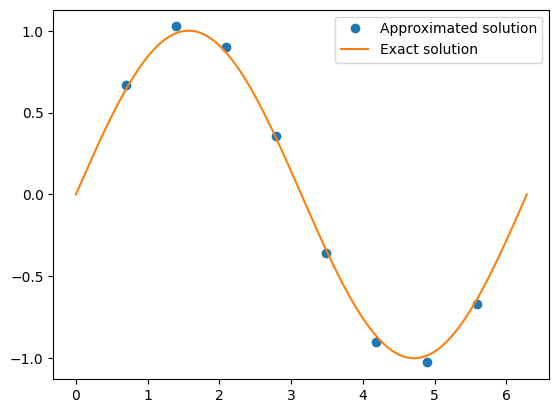

In [ ]:
# Plot the real and approximated solution
fig, ax = plt.subplots()
ax.plot(x[1:-1], u_h, 'o', label='Approximated solution')
ax.plot(x_fine, u_ex(x_fine), '-', label='Exact solution')
ax.legend()

### b) Verify the order of convergence numerically



To verify the order of convergence numerically you have to check the result reducing the spacing of your interval (so increasing the number of intervals called N). In this way you should get a better and better result the more your mesh is fine, and plotting the error behaviour you can check the slope of the error curve as N changes to get the order of convergence. \\

So you first define a set of intervals, and then you iterate the computation of your approximate solution increasing the number of intervals N.

In [ ]:
# Convergence test:
Nvec = np.array([10, 20, 40, 80]) # Let's define a set of intervals

errvec = [] # Initialize the error vector

for N in Nvec: # You're iterating in the vector (or list) Nvec, so: 10, 20, ...
   x, u = solve_poisson_FD(a, b, N, g)

   # Compute the error
   err = np.max(np.abs(u - u_ex(x[1:-1])))
   print('N = ', N, ', err = ', err)
   errvec.append(err)

N =  10 , err =  0.04099253387248303
N =  20 , err =  0.00913195837613201
N =  40 , err =  0.0021640174225235898
N =  80 , err =  0.0005272005141714331


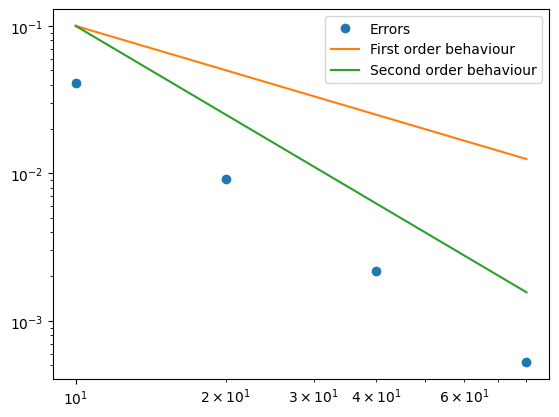

In [ ]:
# Plot the errors:
fig, ax = plt.subplots()
# We use a loglog scale to see the result propetly
ax.loglog(Nvec, errvec, 'o', label='Errors')
ax.loglog(Nvec, 1/np.array(Nvec), '-',label='First order behaviour')
ax.loglog(Nvec, 10/np.array(Nvec)**2, '-', label='Second order behaviour')
ax.legend()

We can notice that increasing the number we get a lower error!! \\
We can see that the order of convergence is 2. \\

END Of the EXERCISE 1

--------------------------------------------------------------------------------

### NOTE (related to Ex.1):

Our matrix A has a DIAGONAL-SHAPE, therefore we have lot of zeros (in this case we have $3N-2$ zero elements). So for this reason we are computing many unnecessary computations and we use too much memory in the computation of $Au=g$. So for this reason we can try to save the matrix in a sparse form and simplify computational cost. \\

\\

To do this we can use an iterative method.

\\

To store a matrix in a NON-stored form we can use 'SciPy' library using the functions: \\


*   coo_array((data, (i,j)), [shape=(M,N)])
*   scipy.sparse.diags()
*   scipy.sparse.eye()

In [ ]:
from scipy.sparse import eye

N = 100

A_sparse = (2*eye(N-2) - eye(N-2, k=1) - eye(N-2, k=-1)).tocoo() # Sparse form of the previous matrix
A_dense = 2*np.eye(N-2) - np.eye(N-2, k=1) - np.eye(N-2, k=1)

sparse_size = A_sparse.data.nbytes + A_sparse.row.nbytes + A_sparse.col.nbytes
dense_size = A_dense.nbytes

print(sparse_size, dense_size) # Look what's the difference!!!

4672 76832


In [ ]:
from scipy.sparse.linalg import cg
from time import time

f = np.ones(N-2)

# Time for the SPARSE system
t0 = time()
x_sparse = cg(A_sparse, f)
t_sparse = time() - t0

# Time for the DENSE system
t0 = time()
x_dense = np.linalg.solve(A_dense, f)
t_dense = time() - t0

print(t_sparse, t_dense)


0.0036373138427734375 0.0004322528839111328


## EXERCISE 2:

Consider the problem \\

\begin{align}
    \begin{cases}
        -u''= f , \quad \textrm{ in } (0,1)\\
        u(0) = u(1) = 0 \\
    \end{cases}
\end{align} \\
with $f(x) = 1$ \\

a) Compute the exact solution \\
b) Solve the problem using finite differences and compute the error. What do you observe?

### a) Compute the exact solution

In this case the problem becomes easier and you can't use the characterisrtic equation because the equation is not homegeneous (since $f(x) = 1$), so we just need to integrate: \\

\\

$-\int u''\, dx = \int 1, dx \Rightarrow \int u'\,dx = \int -x + c_1\, dx \Rightarrow u = -\frac{x^2}{2} +c_1x +c_2 $ \\

\\

Now imposing the bounddary conditions $u(0) = u(1) = 0$, you get that: \\

$c_2 = 0$ and $c_1 = \frac{1}{2}$ \\

\\

So at the end the exact solution is: \\

$u(x) = \frac{1}{2}(x-x^2)$

### b) Solve the problem using finite differences and compute the error. What do you observe?

Here we have a small problem, we have just to modify an element on the function to solve Poisson equation using FD because since $f=1$ if you do g(x[1:-1]) it returns just 1, so you need to multiply by a vector of ones

In [ ]:
def  solve_poisson_FD_reviewed(a, b, N, g):
  '''
  Solves Poissons eq. on (a,b), with N grid points and forcing term g, here
  is reviewed because g(x[1:-1]) returns just 1
  '''

  # Create the grid:
  x = np.linspace(a,b,N)
  h = x[1] - x[0]

  # Create the matrix
  A = 2*np.eye(N-2) - np.eye(N-2, k=-1) - np.eye(N-2, k=1)
  f = h**2 * np.ones(N-2)
  u = np.linalg.solve(A, f) # To solve the system in th metricial form A*u = f

  return x, u

In [ ]:
## Data:

# Extrema of the domain
a = 0
b = 2*np.pi

# Number of nodes
N = 10

# Forcing term (r.h.s)
f = lambda x: 1


In [ ]:
# Solve the approximate solution using finite method
x, u_h = solve_poisson_FD_reviewed(a, b, N, f)

In [ ]:
# Define the exact solutio (computed analitically before)
u_ex = lambda x: 0.5*(x-x**2)
x_fine = np.linspace(a, b, 500)

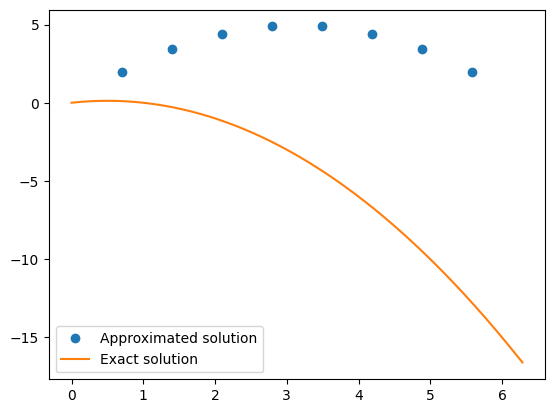

In [ ]:
# Plot real VS approximate solution:
fig, ax = plt.subplots()
ax.plot(x[1:-1], u_h, 'o', label='Approximated solution')
ax.plot(x_fine, u_ex(x_fine), '-', label='Exact solution')
ax.legend()

In [ ]:
# Compute the error:
err = np.max(np.abs(u_h - u_ex(x[1:-1])))
print('N = ', N, ', err = ', err)

N =  10 , err =  14.753436576523486


I observe that the error is basically null and the solution is almost exact, at least much more than the previous case.

## EXERCISE 3:

What is the dimension N of the largest square matrix of floats in dense formad you could build considering your computer RAM? \\
What is the dimension N of the largest finite difference matrix you could built in the COO format?

### ANSWERS:

1) My computer RAM is 16GB which corresponds to $16*1024^3$ bytes, so $17.179.869.184$ bytes. To understand the largest sqare matrix I can create we should consider the memory needed to store the matrix. \\
Each float number of the matrix typically occupy 4 bytes (32 bit). So finally to ge the solution we must evaluate: \\

$Memory_{RAM_{MAX}} = N^2*Memory_{float} ⇒ N \leq \sqrt{\frac{Memory_{RAM_{MAX}}}{Memory_{float}}} ⇒ N \leq \sqrt{\frac{17.179.869.184}{4}}$ \\

So the result is $N \leq 65536$. \\

\\

2) A finite difference matrix is typically a sparse matrix that represents a discretization of a differential operator. \\
A COO format (Coordinate list) is a representation method for sparse matrix. In this format the matrix is represented with a list of tuple that represent the coordinates of the NON-zero elements and their values each tuple contains:


*   Row coordinate
*   Column coordinate
*   value of the NON-zero element

Example:

\begin{equation}
\begin{bmatrix}
1 & 0 & 0 \newline
0 & 0 & 2 \newline
3 & 4 & 0 \newline
\end{bmatrix}
\end{equation}

the COO representation is:
\begin{equation}
row_indices = \begin{bmatrix}
0 & 1 & 2 & 2 \newline
\end{bmatrix}
\end{equation}

\begin{equation}
column_indices = \begin{bmatrix}
0 & 2 & 0 & 1 \newline
\end{bmatrix}
\end{equation}

\begin{equation}
values = \begin{bmatrix}
1 & 2 & 3 & 4 \newline
\end{bmatrix}
\end{equation}


So in this case we can compute the maximum N for a 16GB of RAM as: \\

$Memory_{RAM_{MAX}} = 3*nnz$, where $nnz$ is the number of NON-zero elements of hte matrix. \\
In general we have tha for an $N^2$ dimenion matrix you have that $nnz$ is the same order of $N$, so we can assume $nnz≈N$ and get that:

$N \leq \frac{Memory_{RAM_{MAX}}}{3} ⇒ N ⪅ 1.879.048.192$



## EXERCISE 4:

Consider the problem: \\

\begin{align}
  \begin{cases}
      -u^{\prime\prime} = g(x), \quad \textrm{ in } \Omega=(0,\frac{3}{2}\pi) \newline
      u'(0)=u(\frac{3}{2}\pi)=0 \newline
  \end{cases}
\end{align} \\

with $g(x) = cos(x)$ and the exact solution is $ u(x) = cos(x)$. \\

a) Solve the problem using finite differences. For the one-sided approximation of $u'$ at the origin, use the second order accurate formula: \\
$u'(0) = \frac{-3/2u_0+2u_1-1/2u_2}{Δx}$ \\

b) Check the convergence rate degrades if a first order accurate formula for $u'(0)$ is used.

### a) Solve the problem using finite differences. For the one-sided approximation of $u'$ at the origin, use the second order accurate formula:
$u'(0) = \frac{-3/2u_0+2u_1-1/2u_2}{Δx}$

Here we have the same problem as exercise 1, where we can define in general $-\frac{u_{i+1} - 2 u_i + u_{i-1}}{h^2} = g(x_i)$, with the difference that in this case we also have a condition at the origin which impose the approximation of the derivative there. This lead to the addition of one column and row to the A matrix and an addition of a row to u and g vectors: \\

\begin{equation}
A = \begin{bmatrix}
-3/2 &  2 & -1/2   &        &                            \newline
-1  & 2 &  -1 &        &                            \newline
   &            \ddots    & \ddots & \ddots  &            \newline
   &                       & -1       & 2 & -1  \newline
   &                       &         & -1  & 2 \newline
\end{bmatrix}
\end{equation}

\begin{equation}
{\bf u} = \begin{bmatrix}
u_\mathrm{0} \\
u_\mathrm{1} \\
\vdots \\
u_\mathrm{N-2} \\
\end{bmatrix}, \quad
{\bf g} = h^2 \begin{bmatrix}
0 \\
g_\mathrm{1} \\
\vdots \\
g_\mathrm{N-2} \\
\end{bmatrix}
\end{equation}


In [ ]:
def  solve_poisson_FD_ex4(a, b, N, g):
  '''
  Solves Poissons eq. on (a,b), with N grid points and forcing term g, here
  you have to change the index to get from the first element up to the end minus one
  '''
  # Create the grid:
  x = np.linspace(a,b,N)
  h = x[1] - x[0]

  # Create the matrix
  A = 2*np.eye(N-1) - np.eye(N-1, k=-1) - np.eye(N-1, k=1)
  A[0,0:3] = np.array([-3/2, 2, -1/2])
  f = h**2 * g(x[0:N-1])
  f[0] = 0
  u = np.linalg.solve(A, f) # To solve the system in th metricial form A*u = f

  return x, u

In [ ]:
# Data:
a = 0
b = 3/2*np.pi

N = 10

g = lambda x: np.cos(x)

In [ ]:
# Solve the approximate solution:
x, u_h = solve_poisson_FD_ex4(a, b, N, g)

In [ ]:
# Real solution
u_ex = lambda x: np.cos(x)
x_fine = np.linspace(0, 3/2*np.pi, 500)

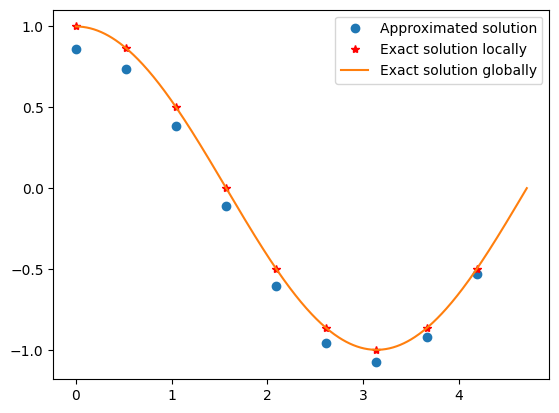

In [ ]:
# Plot real VS approximate solution:
fig, ax = plt.subplots()
ax.plot(x[:N-1], u_h, 'o', label='Approximated solution')
ax.plot(x[:N-1], u_ex(x[:N-1]), 'r*', label='Exact solution locally')
ax.plot(x_fine, u_ex(x_fine), '-', label='Exact solution globally')
ax.legend()

### b) Check the convergence rate degrades if a first order accurate formula for  $u′(0)$  is used.

Same procedure as for the first exercise

In [ ]:
# Convergence test:
Nvec = [40, 80, 160, 320] # Let's define a set of intervals

errvec = [] # Initialize the error vector

for N in Nvec: # You're iterating in the vector (or list) Nvec, so: 10, 20, ...
   x, u = solve_poisson_FD_ex4(a, b, N, g)

   # Compute the error
   err = np.max(np.abs(u[1:] - u_ex(x[1:N-1])))
   print('N = ', N, ', err = ', err)
   errvec.append(err)

N =  40 , err =  0.0019900384200286503
N =  80 , err =  0.000384586338221915
N =  160 , err =  8.371453347311153e-05
N =  320 , err =  1.9469014242323723e-05


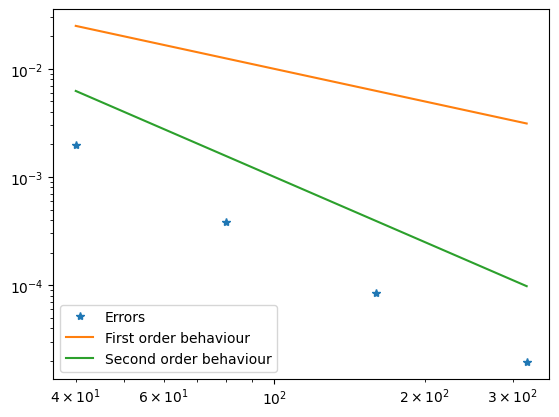

In [ ]:
# Plot the errors:
fig, ax = plt.subplots()
ax.loglog(Nvec, errvec, '*', label='Errors')
# Constants are only added for graphical purposes
ax.loglog(Nvec, 1/np.array(Nvec), '-',label='First order behaviour')
ax.loglog(Nvec, 10/np.array(Nvec)**2, '-', label='Second order behaviour')
ax.legend()

## EXERCISE 5:

Consider the functions \\

$$
f_k(x) = sin(k\pi x), \quad k\in\mathbb{N} \quad on (0, 1) \\
$$

Use Firedrale to verify numerically that $(f_j, f_k) = 0$ for $ k \neq j$, where $(⋅,\cdot)$ is the $L^2, H^1$ or $H_0^1$ scalar product.

### Solution:

The inner product in $L^2$ is: \\
$(u,v)_{L^2}(\Omega) = ∫_{\Omega}u\cdot v~dx$ \\

The inner product in $H^1$ insteas: \\
$(u,v)_{H^1(\Omega)} = (u,v)_{L^2(\Omega)}+(∇u,∇v)_{L^2(Ω)}$

In [ ]:
# Download firedrake
try:
  import firedrake
except ImportError:
  !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
  import firedrak

In [ ]:
import firedrake as fd
import firedrake.pyplot as fdplt
import numpy as np
import matplotlib.pyplot as plt

NON ho idea di come farlo